# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'Data/train.p'
validation_file= 'Data/valid.p'
testing_file = 'Data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Create a copy of the Orginal Images
X_train_copy = X_train
y_train_copy = y_train
X_valid_copy = X_valid
y_valid_copy = y_valid
X_test_copy = X_test
y_test_copy = y_test

## Revert back if required to orginal vales
#X_train = X_train_copy
#y_train = y_train_copy
#X_valid = X_valid_copy
#y_valid = y_valid_copy
#X_test = X_test_copy
#y_test = y_test_copy


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)
n_valid = len(X_valid)
# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
sign_name = tuple(open("signnames.csv", 'r'))
#sign_name = open("signnames.csv").read().split('\n')

#print (sign_name)
#n_classes = len(sign_name) - 1 # No of Classifiers
n_classes = len(np.unique(y_train)) # No of Classifiers

print("Number of training examples =", n_train)
print("Number of Validation examples =", n_valid)
print("Number of testing examples =", n_test)
print ()
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(type(X_train))

Number of training examples = 34799
Number of Validation examples = 4410
Number of testing examples = 12630

Image data shape = (32, 32, 3)
Number of classes = 43
<class 'numpy.ndarray'>


In [3]:
#### Initial Data Dimensions ####

# Images are 32 pixels in each dimension.
img_size = 32

# Number of colour channels for the images: 1 channel for gray-scale and 3 for Color
num_channels = 3

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size, num_channels)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


import random
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import cv2
import time as time
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import numpy as np
%matplotlib inline
import tensorflow as tf
#import prettytensor as pt
from PIL import Image
import matplotlib.image as mpimg
import time
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


def plot_images(images, cls_true, csv_list, cls_pred=None):
    indexes = [random.randrange(0, len(images)) for _ in range (10)]
    #print("Image-indexes=",indexes)
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.figure(figsize=(1,1))
    
    for i, ax in indexes and enumerate(axes.flat):
        #Capture the image
        #image = images[indexes[i]].squeeze()
        image = images[indexes[i]]
        #capture the o/p label of image
        image_discription = cls_true[indexes[i]]
        #Capture the equilivalent sign discription from CSV sheet
        csv_name = csv_list[image_discription + 1]
        
        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "I/P Label: {0}".format(image_discription)
        else:
            xlabel = "True: {0}, Pred: {1}".format(image_discription, cls_pred[indexes[i]])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        #ax.set_title(csv_name)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
        print(csv_name)
        
        # Plot image.
        #image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #ax.imshow(image1)
        ax.imshow(image)
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Plot the images and labels using our helper-function above to display 9 random images
#plot_images(images=X_train, cls_true=y_train, csv_list=sign_name)

Class 0: 0,Speed limit (20km/h)
: 180 samples


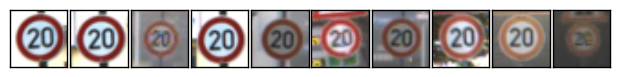

--------------------------------------------------------------------------------------

Class 1: 1,Speed limit (30km/h)
: 1980 samples


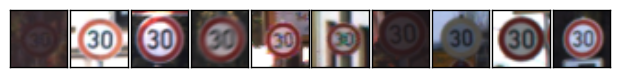

--------------------------------------------------------------------------------------

Class 2: 2,Speed limit (50km/h)
: 2010 samples


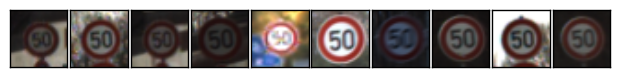

--------------------------------------------------------------------------------------

Class 3: 3,Speed limit (60km/h)
: 1260 samples


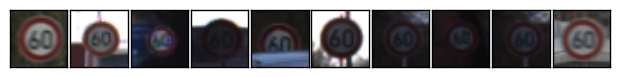

--------------------------------------------------------------------------------------

Class 4: 4,Speed limit (70km/h)
: 1770 samples


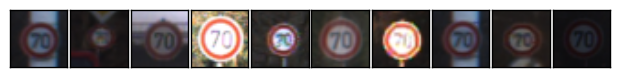

--------------------------------------------------------------------------------------

Class 5: 5,Speed limit (80km/h)
: 1650 samples


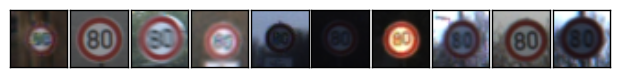

--------------------------------------------------------------------------------------

Class 6: 6,End of speed limit (80km/h)
: 360 samples


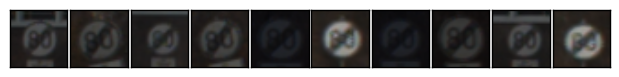

--------------------------------------------------------------------------------------

Class 7: 7,Speed limit (100km/h)
: 1290 samples


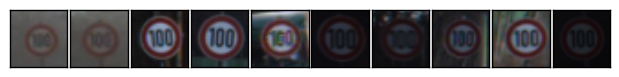

--------------------------------------------------------------------------------------

Class 8: 8,Speed limit (120km/h)
: 1260 samples


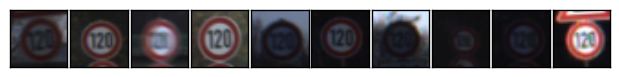

--------------------------------------------------------------------------------------

Class 9: 9,No passing
: 1320 samples


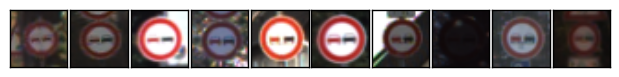

--------------------------------------------------------------------------------------

Class 10: 10,No passing for vehicles over 3.5 metric tons
: 1800 samples


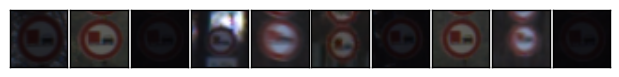

--------------------------------------------------------------------------------------

Class 11: 11,Right-of-way at the next intersection
: 1170 samples


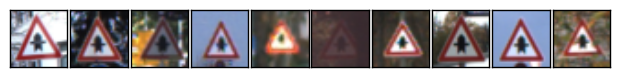

--------------------------------------------------------------------------------------

Class 12: 12,Priority road
: 1890 samples


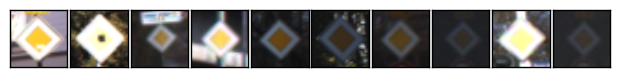

--------------------------------------------------------------------------------------

Class 13: 13,Yield
: 1920 samples


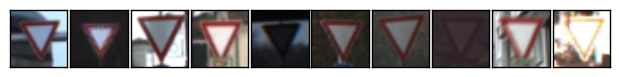

--------------------------------------------------------------------------------------

Class 14: 14,Stop
: 690 samples


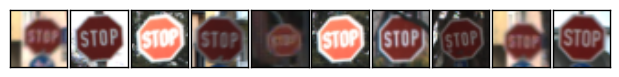

--------------------------------------------------------------------------------------

Class 15: 15,No vehicles
: 540 samples


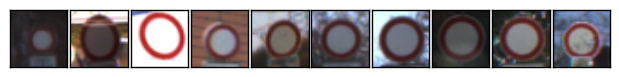

--------------------------------------------------------------------------------------

Class 16: 16,Vehicles over 3.5 metric tons prohibited
: 360 samples


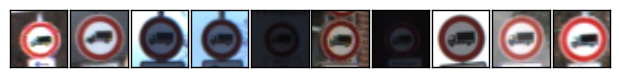

--------------------------------------------------------------------------------------

Class 17: 17,No entry
: 990 samples


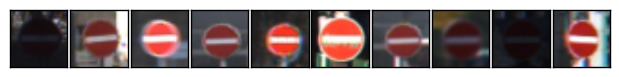

--------------------------------------------------------------------------------------

Class 18: 18,General caution
: 1080 samples


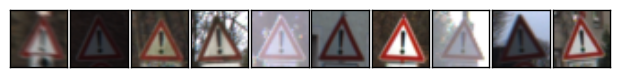

--------------------------------------------------------------------------------------

Class 19: 19,Dangerous curve to the left
: 180 samples


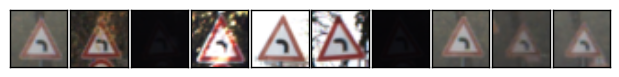

--------------------------------------------------------------------------------------

Class 20: 20,Dangerous curve to the right
: 300 samples


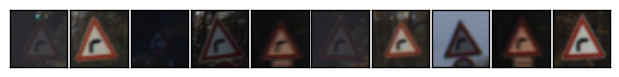

--------------------------------------------------------------------------------------

Class 21: 21,Double curve
: 270 samples


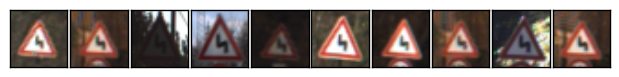

--------------------------------------------------------------------------------------

Class 22: 22,Bumpy road
: 330 samples


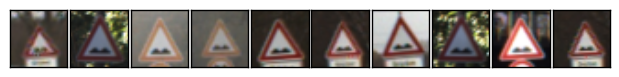

--------------------------------------------------------------------------------------

Class 23: 23,Slippery road
: 450 samples


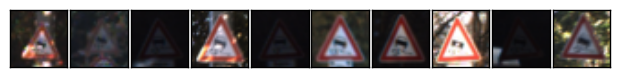

--------------------------------------------------------------------------------------

Class 24: 24,Road narrows on the right
: 240 samples


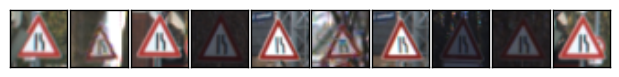

--------------------------------------------------------------------------------------

Class 25: 25,Road work
: 1350 samples


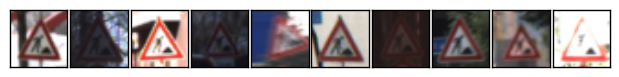

--------------------------------------------------------------------------------------

Class 26: 26,Traffic signals
: 540 samples


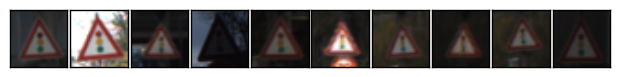

--------------------------------------------------------------------------------------

Class 27: 27,Pedestrians
: 210 samples


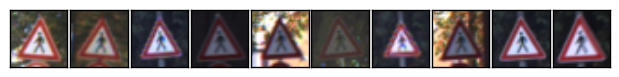

--------------------------------------------------------------------------------------

Class 28: 28,Children crossing
: 480 samples


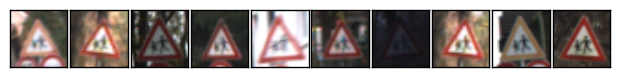

--------------------------------------------------------------------------------------

Class 29: 29,Bicycles crossing
: 240 samples


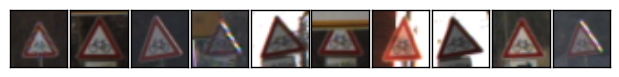

--------------------------------------------------------------------------------------

Class 30: 30,Beware of ice/snow
: 390 samples


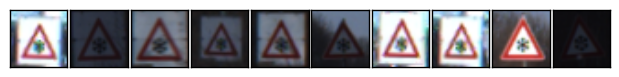

--------------------------------------------------------------------------------------

Class 31: 31,Wild animals crossing
: 690 samples


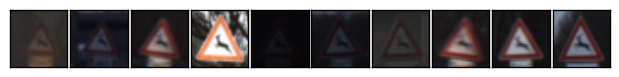

--------------------------------------------------------------------------------------

Class 32: 32,End of all speed and passing limits
: 210 samples


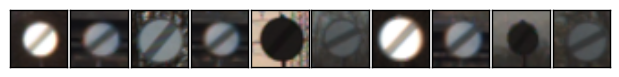

--------------------------------------------------------------------------------------

Class 33: 33,Turn right ahead
: 599 samples


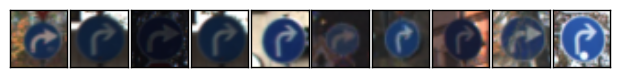

--------------------------------------------------------------------------------------

Class 34: 34,Turn left ahead
: 360 samples


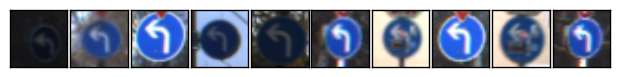

--------------------------------------------------------------------------------------

Class 35: 35,Ahead only
: 1080 samples


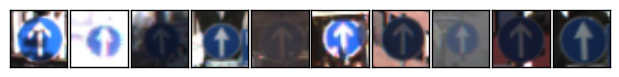

--------------------------------------------------------------------------------------

Class 36: 36,Go straight or right
: 330 samples


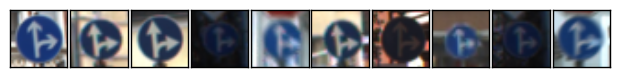

--------------------------------------------------------------------------------------

Class 37: 37,Go straight or left
: 180 samples


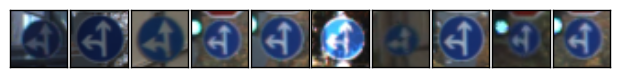

--------------------------------------------------------------------------------------

Class 38: 38,Keep right
: 1860 samples


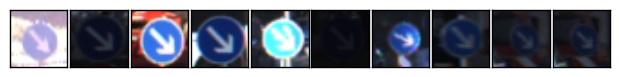

--------------------------------------------------------------------------------------

Class 39: 39,Keep left
: 270 samples


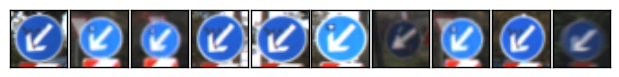

--------------------------------------------------------------------------------------

Class 40: 40,Roundabout mandatory
: 300 samples


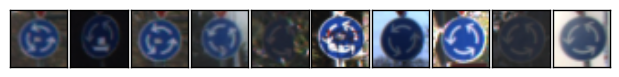

--------------------------------------------------------------------------------------

Class 41: 41,End of no passing
: 210 samples


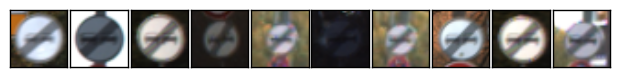

--------------------------------------------------------------------------------------

Class 42: 42,End of no passing by vehicles over 3.5 metric tons
: 210 samples


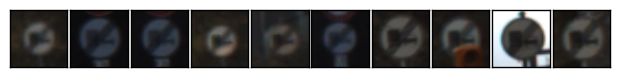

--------------------------------------------------------------------------------------



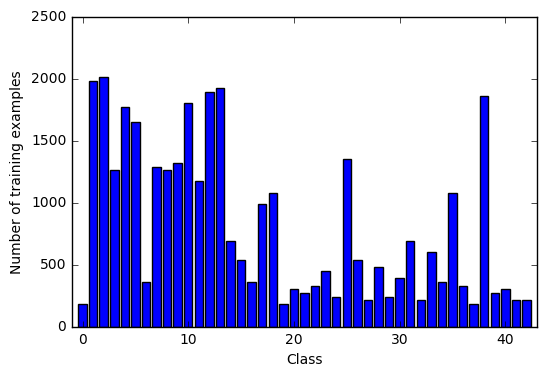

In [5]:
#go through all dataset classes, noting number of samples and plotting 10 random images representing each class.

import numpy as np
import random
from matplotlib import pyplot

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

col_width = max(len(name) for name in sign_name)

#print(max(len(sign_name)))
#print(len(sign_name))
#print("col_width",col_width)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    format_list = [c, sign_name[c + 1], str(c_count)]
    print("Class {}: {}: {} samples".format(*format_list))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [6]:
# Image Pre-Processing :

# Applied the following preprocessing for image data,
# first applied histogram equalization so the effect of brightness is removed. I used openCV'2 cv2
# then scaled images between -.5 and .5, by dividing by 255. and subtracting .5.

def pre_process_image(image):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

4,Speed limit (70km/h)

2,Speed limit (50km/h)

8,Speed limit (120km/h)

3,Speed limit (60km/h)

10,No passing for vehicles over 3.5 metric tons

6,End of speed limit (80km/h)

5,Speed limit (80km/h)

9,No passing

12,Priority road



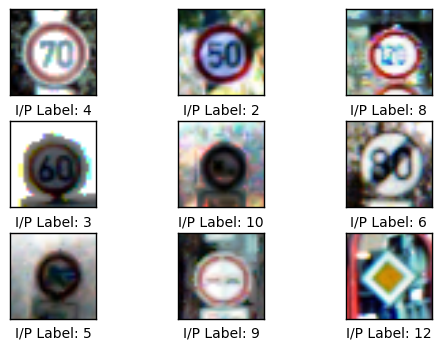

In [7]:
# Test the images of Pre-processed Images

image_preprocess_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))], dtype = np.float32)
image_preprocess_valid = np.array([pre_process_image(X_valid[i]) for i in range(len(X_valid))], dtype = np.float32)
image_preprocess_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))], dtype = np.float32)

X_train = image_preprocess_train
X_valid = image_preprocess_valid
X_test = image_preprocess_test
#One-hot encode of labels of Testing Set
#OH_labels_test = tf.one_hot(y_test, 43)

# Plot the images and labels using our helper-function above to display 9 random images of Pre-processed data
plot_images(images=X_train+.5, cls_true=y_train, csv_list=sign_name)

### Augmentation
The amount of data we have is not sufficient for a model to generalise well. It is also fairly unbalanced, and some classes are represented to significantly lower extent than the others. But we will fix this with data augmentation!

In [8]:
def transform_image(image,ang_range,shear_range,trans_range):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))

    #image = pre_process_image(image)

    return image

def get_index_dict(y_train):
    # Returns indices of each label
    # Assumes that the labels are 0 to N-1
    dict_indices = {}
    ind_all = np.arange(len(y_train))

    for i in range(len(np.unique(y_train))):
        ind_i = ind_all[y_train == i]
        dict_indices[i] = ind_i
        #print(ind_i)
    return dict_indices


def gen_transformed_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):

    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train))
    X_arr = []
    Y_arr = []
    n_train = len(X_train)
    for i in range(n_train):
        for i_n in range(n_each):
            img_trf = transform_image(X_train[i],ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(y_train[i])

    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())

    if (randomize_Var == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr

    labels_arr = tf.one_hot(Y_arr, 43)

    return X_arr,Y_arr,labels_arr

XTrain:Before 34799
X_train:After 347990

Time usage: 0:00:44

33,Turn right ahead

14,Stop

25,Road work

24,Road narrows on the right

9,No passing

25,Road work

5,Speed limit (80km/h)

10,No passing for vehicles over 3.5 metric tons

5,Speed limit (80km/h)



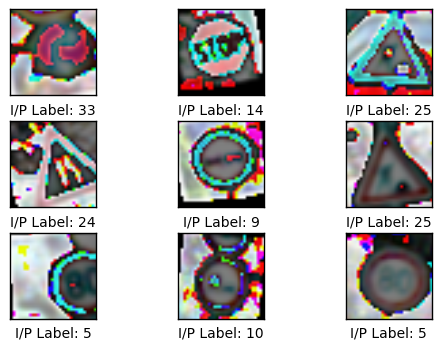

In [9]:
# Test the images of Augumented Images

# Start-time used for printing time-usage below.
start_time = time.time()

print("XTrain:Before",len(X_train))

Image_train_trans,y_train_trans,labels_train_trans = gen_transformed_data(X_train,y_train,43,10,30,5,5,1)

X_train = Image_train_trans
y_train = y_train_trans

print("X_train:After",len(X_train))


# Ending time.
end_time = time.time()

# Difference between start and end-times.
time_dif = end_time - start_time
# Print the time-usage.
print()
print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
print()


# Plot the images and labels to display 9 random images of Transformed Augumented Data
plot_images(images=X_train, cls_true=np.int32(y_train), csv_list=sign_name)
#plt.imshow(Image_train_trans[50]);

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
        #### Layer 0 ######
    # Layer 0: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W_CL0 = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean = mu, stddev = sigma))
    B_CL0 = tf.Variable(tf.zeros(3))
    Conv_layer0 = tf.nn.conv2d(x, W_CL0, strides=[1, 1, 1, 1], padding='VALID') + B_CL0
    
        #### Layer 1 ######
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W_CL1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    B_CL1 = tf.Variable(tf.zeros(32))
    Conv_layer1 = tf.nn.conv2d(x, W_CL1, strides=[1, 1, 1, 1], padding='VALID') + B_CL1

    # Activation for Layer1 (relu).
    Conv_layer1 = tf.nn.relu(Conv_layer1) 
    #Drop-Out 
    Conv_layer1 = tf.nn.dropout(Conv_layer1, keep_prob)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    Conv_layer1 = tf.nn.max_pool(Conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
        #### Layer 2 ######
    # Layer 2: Convolutional. Output = 10x10x16.
    W_CL2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    B_CL2 = tf.Variable(tf.zeros(64))
    Con_layer2 = tf.nn.conv2d(Conv_layer1, W_CL2, strides=[1, 1, 1, 1], padding='VALID') + B_CL2
    
    # Activation for layer2 (relu).
    Con_layer2 = tf.nn.relu(Con_layer2)
    #Drop-Out 
    Con_layer2 = tf.nn.dropout(Con_layer2, keep_prob)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    Con_layer2 = tf.nn.max_pool(Con_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    Flat_out1 = flatten(Conv_layer1)
    Flat_out2 = flatten(Con_layer2)
    
    Flat_out = tf.concat([Flat_out1, Flat_out2], 1)
    
    #print("shape of flat---")
    #print(Flat_out)
    
        #### Layer 3 ######
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    W_FCL1 = tf.Variable(tf.truncated_normal(shape=(7872, 128), mean =mu, stddev = sigma))
    B_FCL1 = tf.Variable(tf.zeros(128))
    Fully_conn_layer1 = tf.matmul(Flat_out, W_FCL1) + B_FCL1
    
    # Activation.
    Fully_conn_layer1 = tf.nn.relu(Fully_conn_layer1)
    #Drop-Out 
    Fully_conn_layer1 = tf.nn.dropout(Fully_conn_layer1, keep_prob)
    
        #### Layer 4 ######
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    W_FCL2 = tf.Variable(tf.truncated_normal(shape=(128, 84), mean =mu, stddev = sigma))
    B_FCL2 = tf.Variable(tf.zeros(84))
    Fully_conn_layer2 = tf.matmul(Fully_conn_layer1, W_FCL2) + B_FCL2
    
    # Activation.
    Fully_conn_layer2 = tf.nn.relu(Fully_conn_layer2)
    #Drop-Out 
    Fully_conn_layer2 = tf.nn.dropout(Fully_conn_layer2, keep_prob)
    
        #### Layer 5 or O/P Layer ######
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    W_FCL3 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean =mu, stddev = sigma))
    B_FCL3 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(Fully_conn_layer2, W_FCL3) + B_FCL3
    

    # Weights L2 Regularization
    regularizers = (tf.nn.l2_loss(W_CL0)+ 
                    tf.nn.l2_loss(W_CL1) + 
                    tf.nn.l2_loss(W_CL2)+ 
                    tf.nn.l2_loss(W_FCL1) + 
                    tf.nn.l2_loss(W_FCL2)+ 
                    tf.nn.l2_loss(W_FCL3))
    
    
    return logits,regularizers

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

#y_true = tf.placeholder(tf.float32, shape=[None], name='y_true')
#y_true_cls = tf.argmax(y_true, dimension=1)
features = tf.placeholder(tf.float32, shape=[None, img_size, img_size,num_channels], name='features')
labels_true = tf.placeholder(tf.float32,shape=[None,n_classes], name='y_true')
#labels_true_cls = tf.argmax(labels_true, dimension=1)

In [13]:
rate = 0.001
keep_prob = 0.7
beta = 0.00001

logits, regularizers = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)*beta*regularizers
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Label predictions:
#labels_pred = tf.nn.softmax(logits)
#labels_pred_cls = tf.argmax(labels_pred, dimension=1)
y_pred = tf.nn.softmax(logits)

y_pred_cls = tf.argmax(y_pred, dimension=1)
#labels_pred_cls = tf.argmax(logits, 1)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        #cls_pred = sess.run(labels_pred_cls, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples)*100

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import time
from datetime import timedelta

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    # Start-time used for printing time-usage below.
    start_time = time.time()
    
    print("# Training Samples:",num_examples)
    print()
    print("Training....")
    print()
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

# Training Samples: 347990

Training....

EPOCH 1 ...
Validation Accuracy = 83.900

EPOCH 2 ...
Validation Accuracy = 85.646

EPOCH 3 ...
Validation Accuracy = 89.546

EPOCH 4 ...
Validation Accuracy = 91.995

EPOCH 5 ...
Validation Accuracy = 92.925

EPOCH 6 ...
Validation Accuracy = 94.739

EPOCH 7 ...
Validation Accuracy = 94.694

EPOCH 8 ...
Validation Accuracy = 95.646

EPOCH 9 ...
Validation Accuracy = 95.986

EPOCH 10 ...
Validation Accuracy = 95.601

EPOCH 11 ...
Validation Accuracy = 94.717

EPOCH 12 ...
Validation Accuracy = 94.580

EPOCH 13 ...
Validation Accuracy = 95.351

EPOCH 14 ...
Validation Accuracy = 94.717

EPOCH 15 ...
Validation Accuracy = 94.739

EPOCH 16 ...
Validation Accuracy = 94.218

EPOCH 17 ...
Validation Accuracy = 95.034

EPOCH 18 ...
Validation Accuracy = 95.442

EPOCH 19 ...
Validation Accuracy = 95.465

EPOCH 20 ...
Validation Accuracy = 96.531

Model saved
Time usage: 0:25:02


Test Accuracy = 93.959


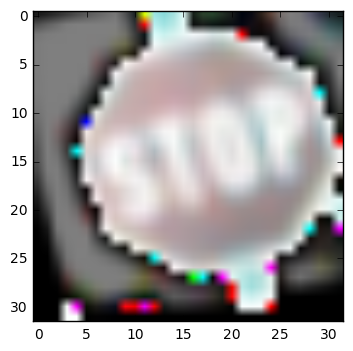

CLASS-ID:[14],: Dis:14,Stop



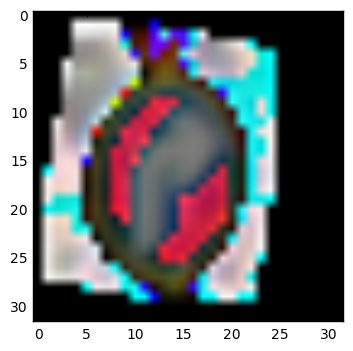

CLASS-ID:[33],: Dis:33,Turn right ahead



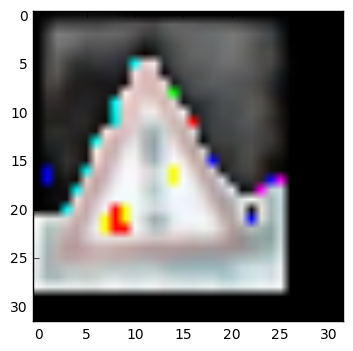

CLASS-ID:[18],: Dis:18,General caution



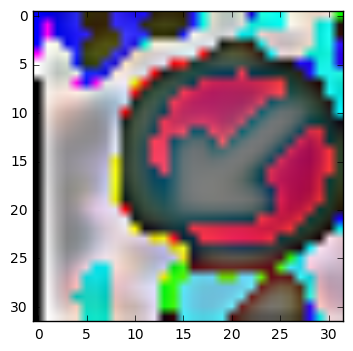

CLASS-ID:[39],: Dis:39,Keep left



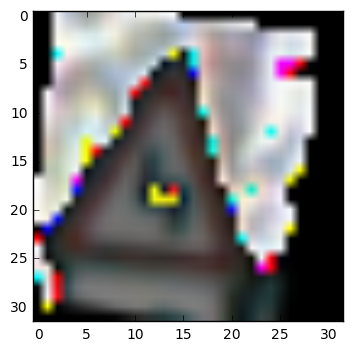

CLASS-ID:[21],: Dis:21,Double curve



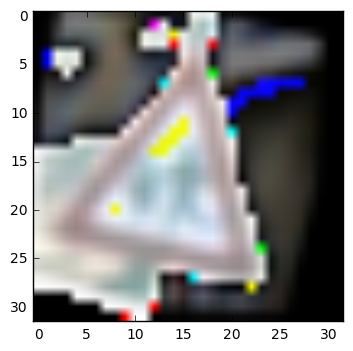

CLASS-ID:[28],: Dis:28,Children crossing



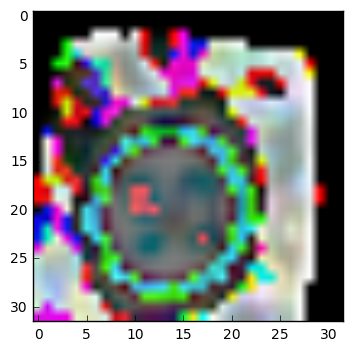

CLASS-ID:[2],: Dis:2,Speed limit (50km/h)



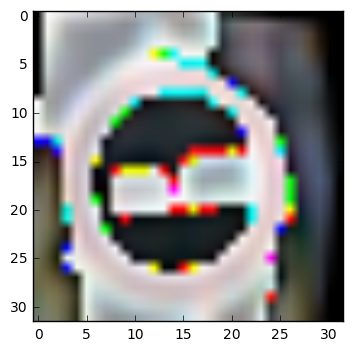

CLASS-ID:[9],: Dis:9,No passing



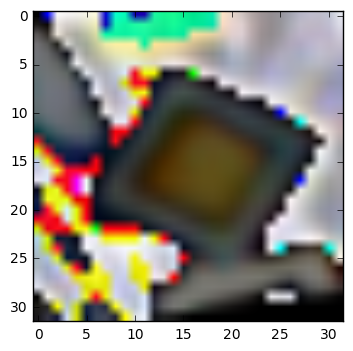

CLASS-ID:[12],: Dis:12,Priority road



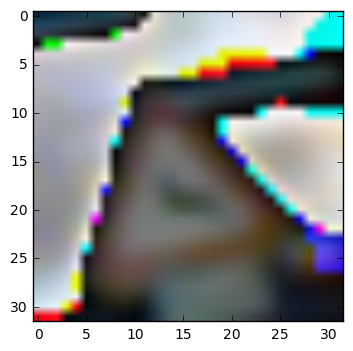

CLASS-ID:[31],: Dis:31,Wild animals crossing



In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    # Predict the New Image Classification:
    prediction1 = tf.argmax(logits, 1)
    img1 = X_train[10:20] # At this time testing with one of the Train Image itself
   
    for i in range(10):
        plt.imshow(img1[i])
        plt.show()
        class1 = sess.run(prediction1, feed_dict={x: [img1[i]]})
        class_int = int(class1)
        #print("class1",class_int)
        csv_name = sign_name[class_int + 1]
        print("CLASS-ID:{0},: Dis:{1}".format(class1, csv_name))
        
    

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [88]:
def process_newimage_file(name):
    image = cv2.imread(name)
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    return image

def plot_newImage_3C(n_row,n_col,X,namenewdata):

    plt.figure(figsize = (8,6))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.15) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = i
        plt.imshow(X[ind_plot])
        #plt.title(namenewdata[ind_plot].split('.'))
        plt.title(namenewdata[ind_plot].split('.')[0])
        plt.axis('off')
    plt.show()

### Load and Output the Images

In [89]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

newdata = [process_newimage_file("./new_signs/"+name) for name in os.listdir("./new_signs/")]
namenewdata = [name for name in os.listdir("./new_signs/")]
newdata = np.array(newdata ,dtype = np.float32)
print(type(newdata))
print(len(newdata))
print(namenewdata)

<class 'numpy.ndarray'>
9
['StopSign.jpg', 'TrafficSign.jpg', 'No-Entry.jpg', '30-miles.jpg', 'Curve-Ahead.jpg', 'MenAtWork.jpg', 'Left-Turn.jpg', 'Bump.jpg', 'Yield.jpg']


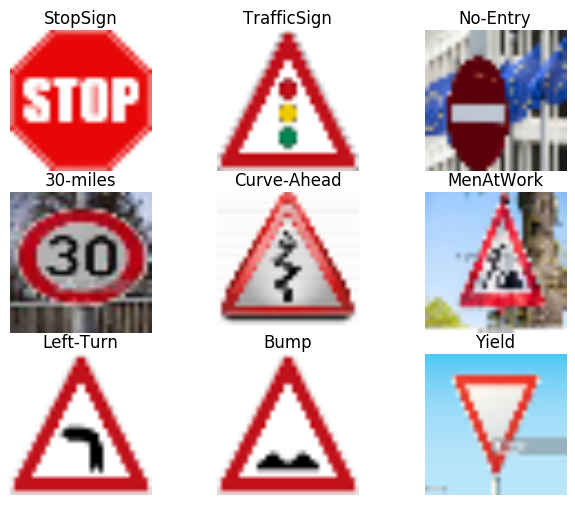

In [90]:
plot_newImage_3C(3,3,newdata+.5,namenewdata)

### Predict the Sign Type for Each Image

In [93]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

keep_prob = 1.0

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    
    prediction1 = tf.argmax(logits, 1)
    class1 = sess.run(prediction1, feed_dict={x: newdata})
    
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: newdata})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)
    top5_pred = predictions
    #print("values",values)
    #print("indices",indices)
    
    #print("org-probs",probs)
    #print("predictions",predictions)
    print("Predicition Complete.")
    print("Predicited Class ID",class1)


Predicition Complete.
Predicited Class ID [13 31 17  2 25 25 19 22 13]


### Analyze Performance

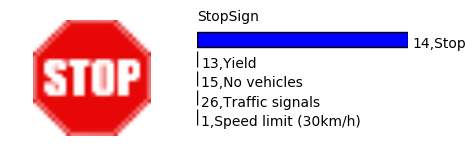

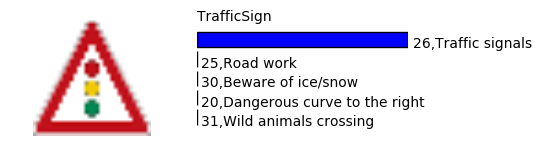

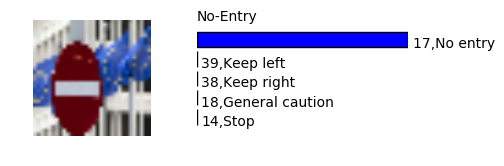

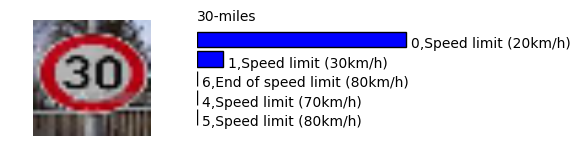

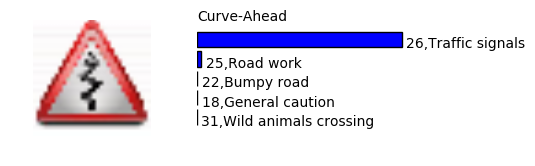

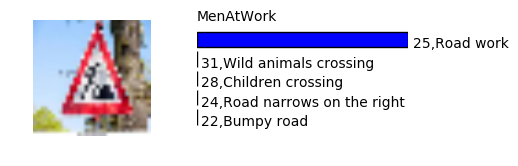

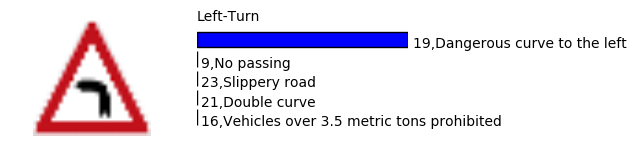

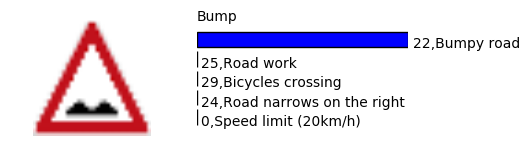

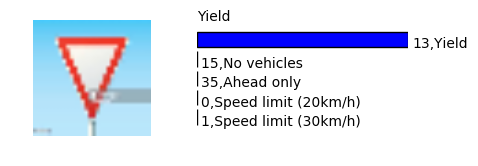

In [94]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

from pylab import *

for i in range(9):
    performance = [float("{:.2f}".format(x)) for x in probs[i]]
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(newdata[i]+.5)
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(7-np.arange(5),performance, align='center')
    for i_label in range(5):
        plt.text(probs[i][i_label]+.02,6-i_label-.25,sign_name[top5_pred[i][i_label]+1])
    plt.axis('off');
    plt.text(0,8.0,namenewdata[i].split('.')[0]);
    plt.show();
    
    

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 